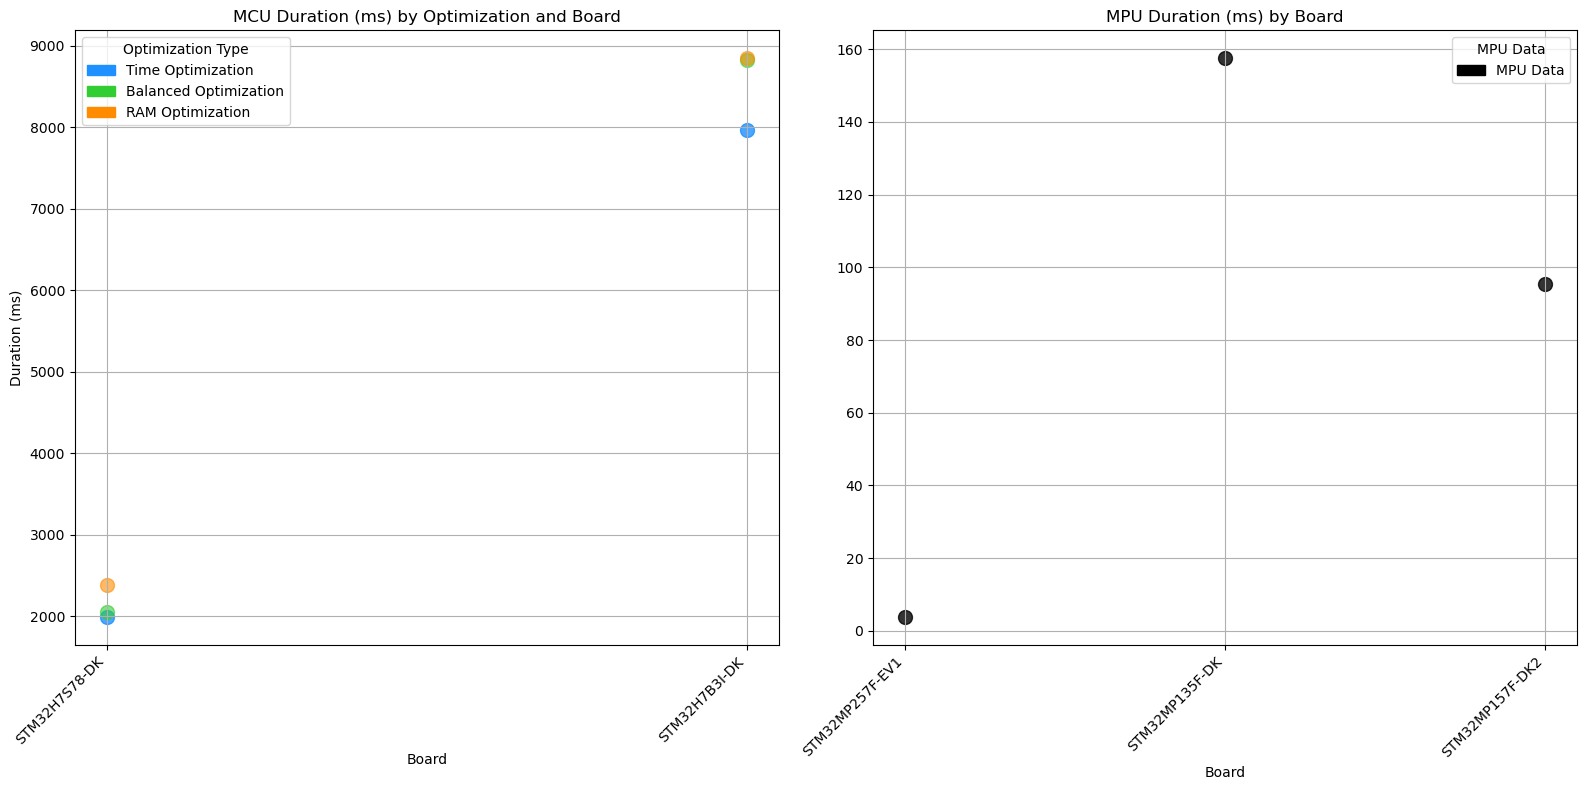

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Load the CSV files into DataFrames
df = pd.read_csv('../data/mobileNet_128/1_0/standard/mobilenet_v1_1.0_128_MCU.csv', delimiter=',')
dfMPU = pd.read_csv('../data/mobileNet_128/1_0/standard/mobilenet_v1_1.0_128_MPU.csv', delimiter=',')

# Desired boards for each DataFrame
desired_auto_retrieved = df['board'].unique()

# Filter for only the desired boards
df = df[df['board'].isin(desired_auto_retrieved)]

df = df.dropna(subset=['optimization'])

dfMPU = dfMPU.dropna(subset=['duration_ms'])

dfMPU.sort_values(by='duration_ms')
desired_auto_retrieved_MPU = dfMPU['board'].unique()

# Filter for rows where optimization is 'time', 'balanced', and 'ram'
time_optimization_df = df[df['optimization'] == 'time']
bal_optimization_df = df[df['optimization'] == 'balanced']
ram_optimization_df = df[df['optimization'] == 'ram']

# Ensure that data is sorted by board
time_optimization_df = time_optimization_df.sort_values(by='board')
bal_optimization_df = bal_optimization_df.sort_values(by='board')
ram_optimization_df = ram_optimization_df.sort_values(by='board')

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharey=False)

# Plot the data from df on the first subplot
for board in desired_auto_retrieved:
    board_time_data = time_optimization_df[time_optimization_df['board'] == board]
    board_bal_data = bal_optimization_df[bal_optimization_df['board'] == board]
    board_ram_data = ram_optimization_df[ram_optimization_df['board'] == board]
    
    # Plot time optimization with brighter color and larger dots
    ax1.scatter([board] * len(board_time_data), board_time_data['duration_ms'], label=None, color='dodgerblue', alpha=0.8, s=100)
    # Plot balanced optimization with natural color and larger dots
    ax1.scatter([board] * len(board_bal_data), board_bal_data['duration_ms'], label=None, color='limegreen', alpha=0.6, s=100)
    # Plot ram optimization with darker color and larger dots
    ax1.scatter([board] * len(board_ram_data), board_ram_data['duration_ms'], label=None, color='darkorange', alpha=0.6, s=100)

# Plot the data from dfMPU on the second subplot
for board in dfMPU['board']:
    board_data = dfMPU[dfMPU['board'] == board]
    ax2.scatter([board] * len(board_data), board_data['duration_ms'], label=None, color='black', alpha=0.8, s=100)

# Create custom legend patches
time_patch = mpatches.Patch(color='dodgerblue', label='Time Optimization')
bal_patch = mpatches.Patch(color='limegreen', label='Balanced Optimization')
ram_patch = mpatches.Patch(color='darkorange', label='RAM Optimization')
mpu_patch = mpatches.Patch(color='black', label='MPU Data')

# Add legends
ax1.legend(handles=[time_patch, bal_patch, ram_patch], title='Optimization Type')
ax2.legend(handles=[mpu_patch], title='MPU Data')

# Customize the plots
ax1.set_title('MCU Duration (ms) by Optimization and Board')
ax1.set_xlabel('Board')
ax1.set_ylabel('Duration (ms)')
ax1.set_xticks(range(len(desired_auto_retrieved)))
ax1.set_xticklabels(desired_auto_retrieved, rotation=45, ha='right')
ax1.grid(True)

ax2.set_title('MPU Duration (ms) by Board')
ax2.set_xlabel('Board')
ax2.set_xticks(range(len(desired_auto_retrieved_MPU)))
ax2.set_xticklabels(desired_auto_retrieved_MPU, rotation=45, ha='right')
ax2.grid(True)


plt.tight_layout()  # Adjust layout to fit x-axis labels
plt.show()

In [ ]:
print(desired_auto_retrieved_MPU)

NameError: name 'desired_auto_retrieved_MPU' is not defined